In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = xr.open_dataset("data/NP_output.nc")
ds = ds.assign_coords(time=ds.time.astype("float")*1e-9/86400)

In [3]:
total = (ds.P+ds.N+ds.Nr).integrate(["xC","yC","zC"])

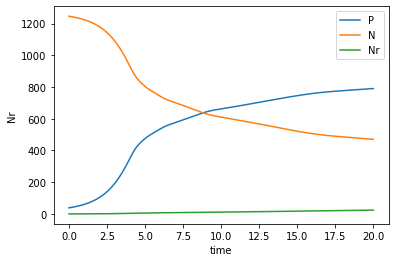

In [14]:
zmin = -100
fig,ax = plt.subplots()
ds.P.mean(["xC","yC"]).sel(zC=slice(-100,0)).integrate("zC").plot(label="P")
ds.N.mean(["xC","yC"]).sel(zC=slice(-100,0)).integrate("zC").plot(label="N")
ds.Nr.mean(["xC","yC"]).sel(zC=slice(-100,0)).integrate("zC").plot(label="Nr")
ax.legend()

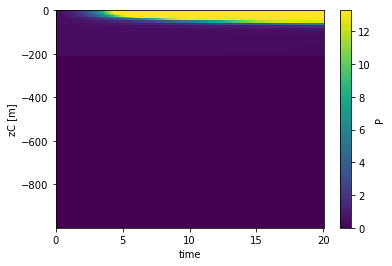

In [7]:
ds.P.mean(["xC","yC"]).T.plot()

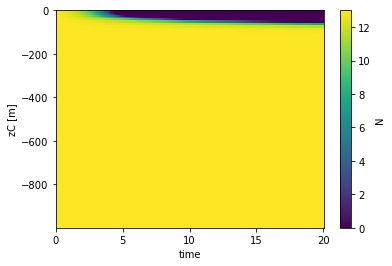

In [8]:
ds.N.mean(["xC","yC"]).T.plot()

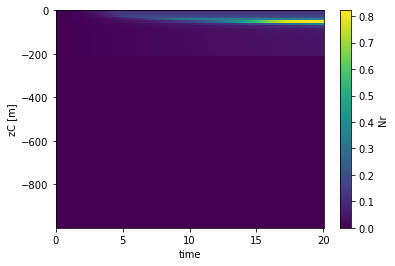

In [9]:
ds.Nr.mean(["xC","yC"]).T.plot()

[(-0.01, 0.01)]

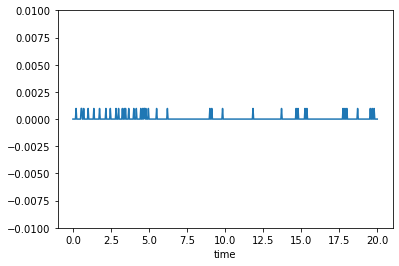

In [13]:
fig,ax = plt.subplots()
(total-total.isel(time=0)).plot()
ax.set(
    ylim=[-1e-2,1e-2],
)